<a href="https://colab.research.google.com/github/piyush1856/neural-network/blob/main/_8Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#Source and Reference: https://blog.keras.io/building-autoencoders-in-keras.html


import keras
from keras import layers
from keras.datasets import mnist
import numpy as np



(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalization of input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [3]:
#AutoEncoder model - Functional
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)


decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [4]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.3417 - val_loss: 0.1681
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1588 - val_loss: 0.1381
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1369 - val_loss: 0.1289
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.1276 - val_loss: 0.1197
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1191 - val_loss: 0.1140
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1143 - val_loss: 0.1104
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1108 - val_loss: 0.1073
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1079 - val_loss: 0.1050
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1057 - val_loss: 0.1031
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1039 - val_loss: 0.1016
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1025 - val_loss: 0.1002
Epoch 12/100
235/235 ━━━━━━━

In [5]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

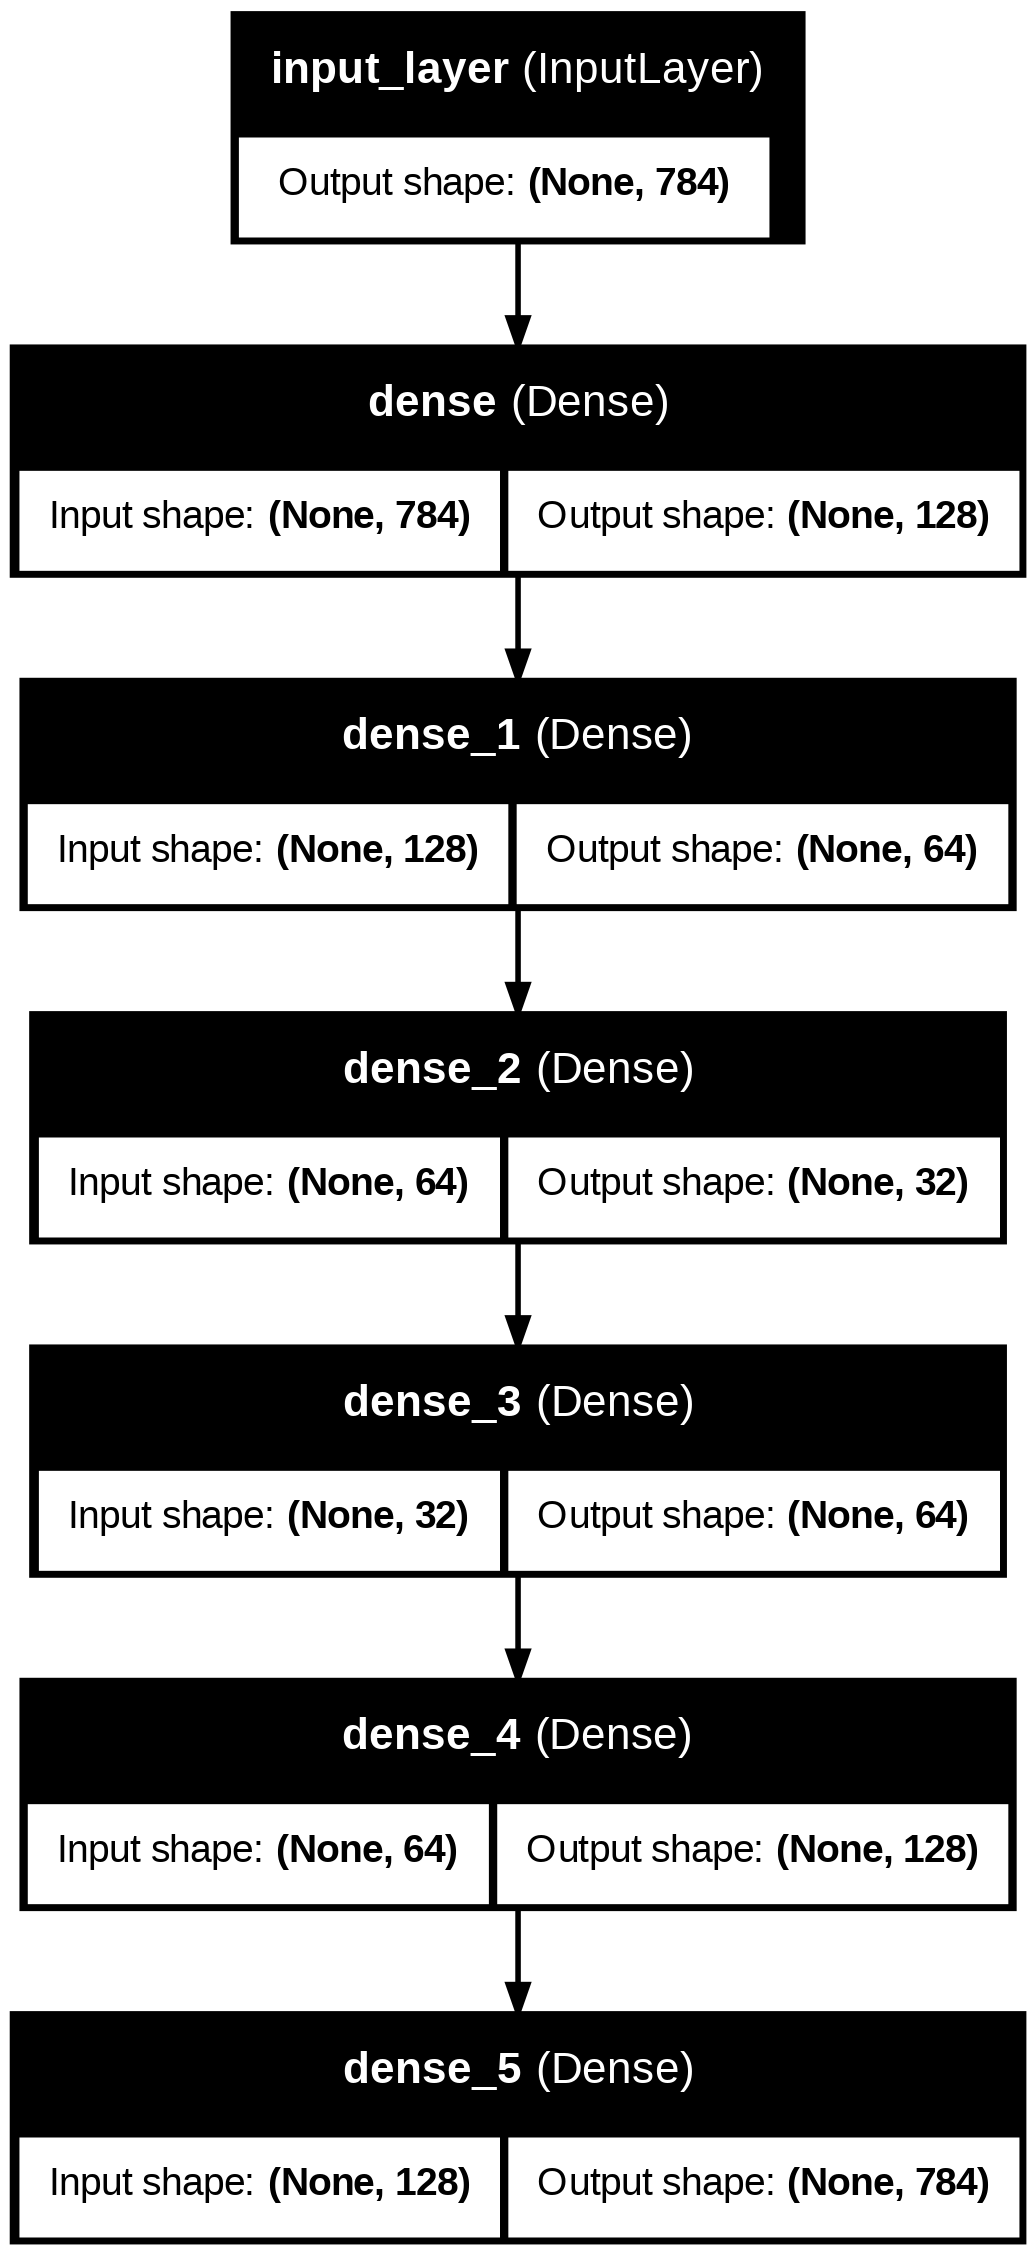

In [8]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


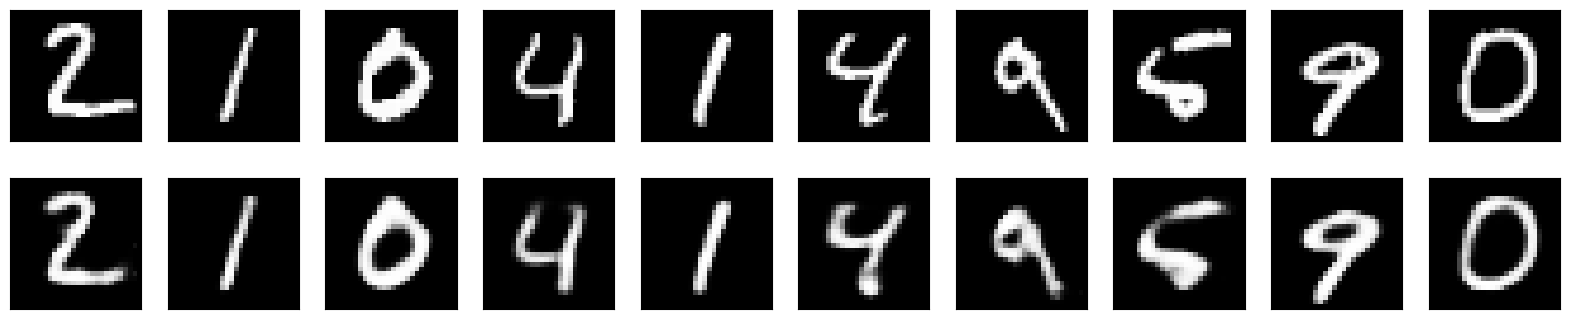

In [10]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoder model for 2D encoding

In [11]:
#AutoEncoder model for 2D encoding
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(4, activation='relu')(encoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [12]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,834 (874.35 KB)

 Trainable params: 223,834 (874.35 KB)

 Non-trainable params: 0 (0.00 B)

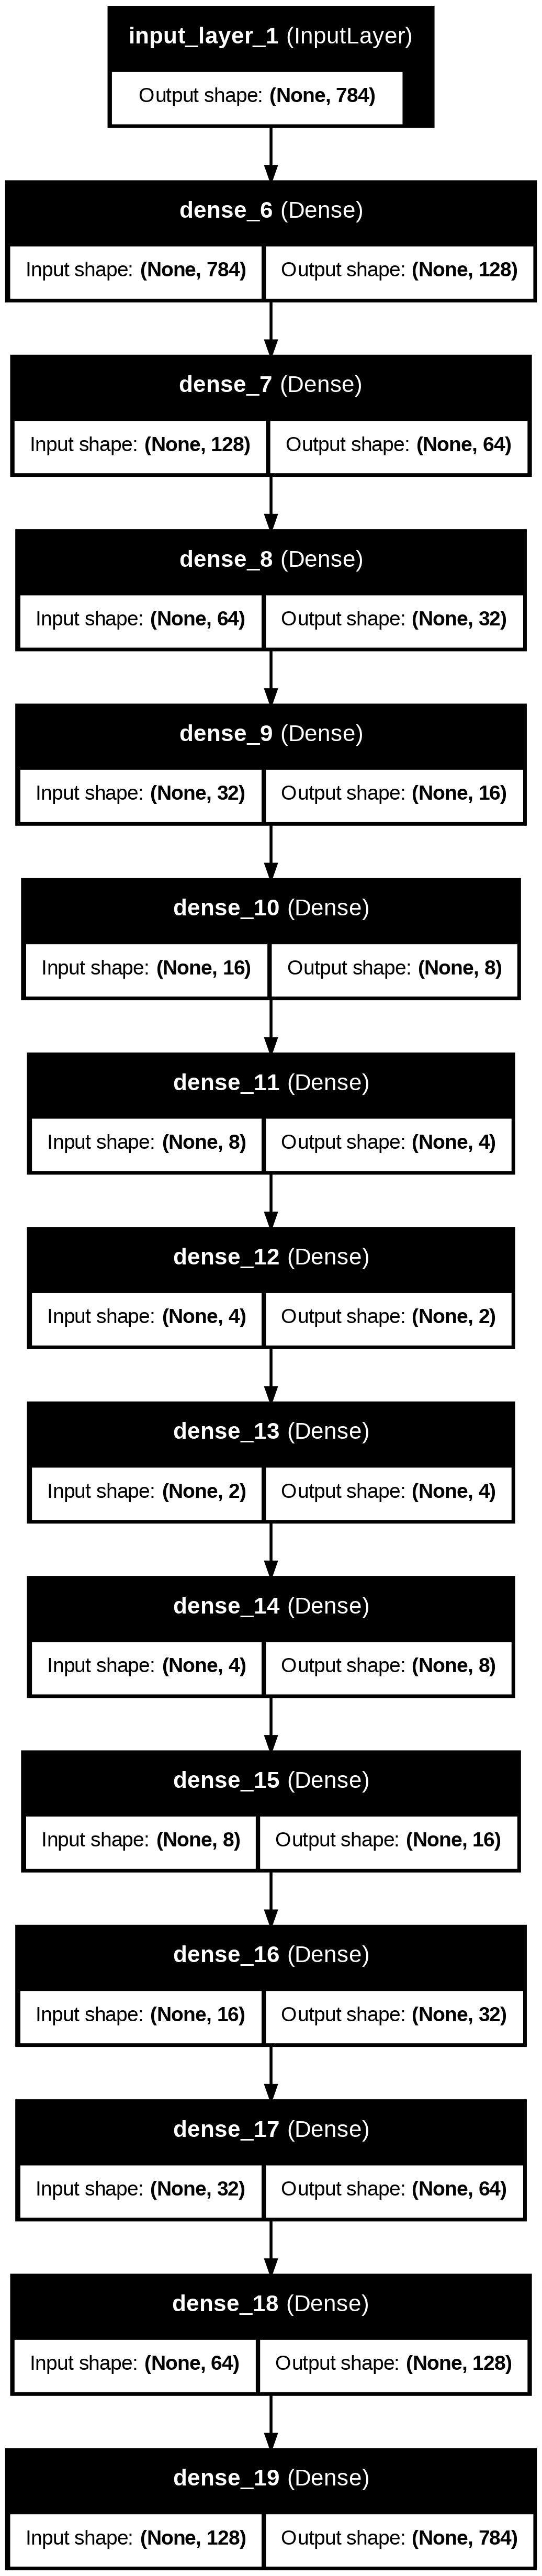

In [14]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [15]:
model.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.6724 - val_loss: 0.6155
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5988 - val_loss: 0.5535
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.5399 - val_loss: 0.5038
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.4927 - val_loss: 0.4638
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.4547 - val_loss: 0.4314
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4239 - val_loss: 0.4050
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3989 - val_loss: 0.3834
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.3782 - val_loss: 0.3656
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3616 - val_loss: 0.3508
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.3474 - val_loss: 0.3385
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3358 - val_loss: 0.3281
Epoch 12/100
235/235 ━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


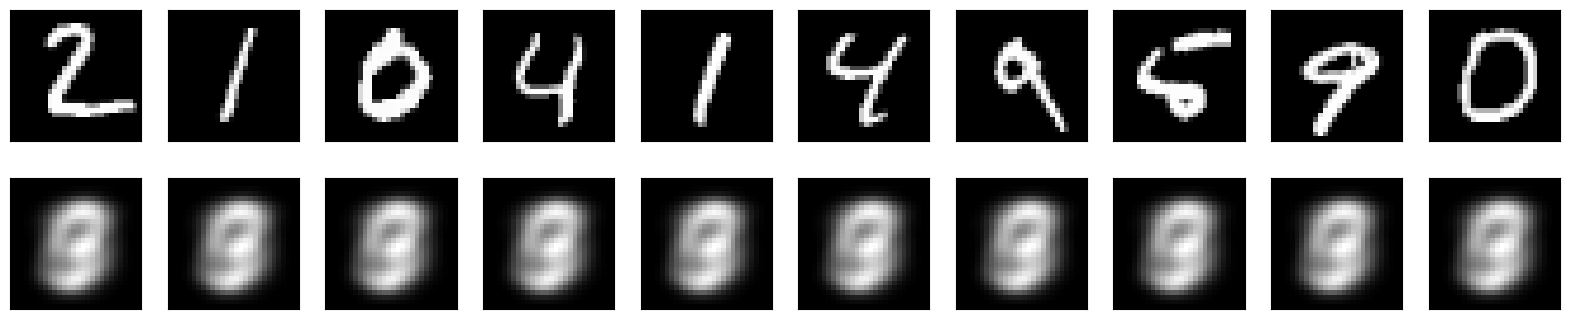

In [16]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### How to get the output of intermediate layer ?

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,504 (2.56 MB)

 Trainable params: 223,834 (874.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 447,670 (1.71 MB)

In [18]:
model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>,
 <Dense name=dense_15, built=True>,
 <Dense name=dense_16, built=True>,
 <Dense name=dense_17, built=True>,
 <Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>]

In [19]:
model.layers[7].output

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_14>

In [20]:
dim_2_model = keras.Model(model.input, model.layers[7].output)

### Comparing results with tsne

In [21]:
!pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.1 MB/s eta 0:00:00


In [22]:
from openTSNE import TSNE

In [23]:
indices = np.random.choice(x_test.shape[0], 1000, replace = False)

In [24]:
sample = x_test[indices]

In [25]:
sample_y = y_test[indices]

In [26]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(sample)

CPU times: user 32.2 s, sys: 794 ms, total: 33 s
Wall time: 43.8 s


### Visualizing t-SNE results

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.husl_palette(len(np.unique(sample_y))))

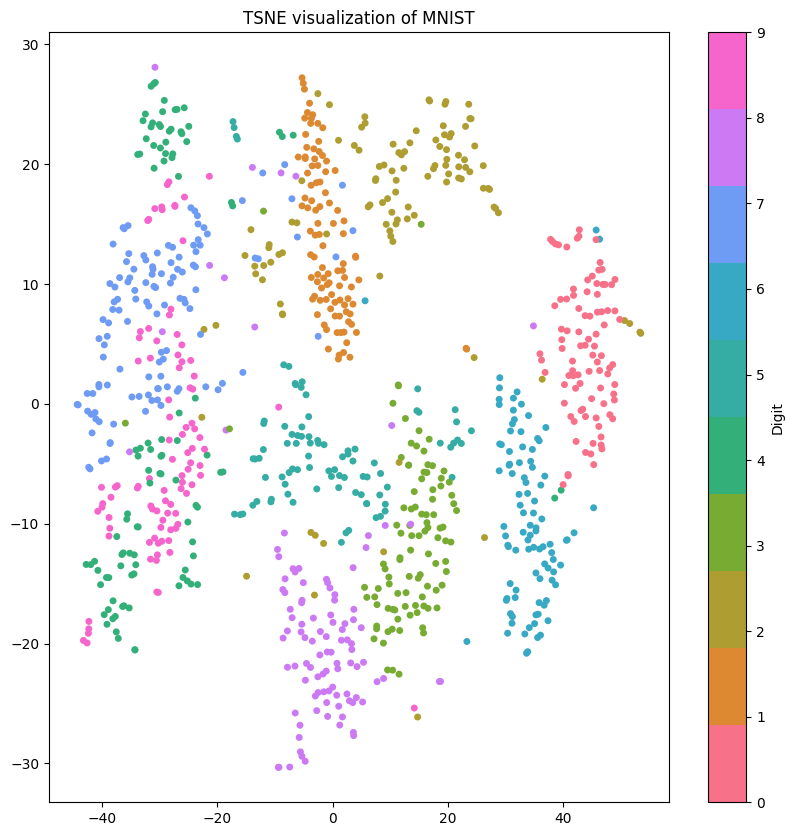

In [28]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

### Visualizing AE results

In [29]:
dim_2d = dim_2_model.predict(sample)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [30]:
dim_2d

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [31]:
dim_2d.shape

(1000, 2)

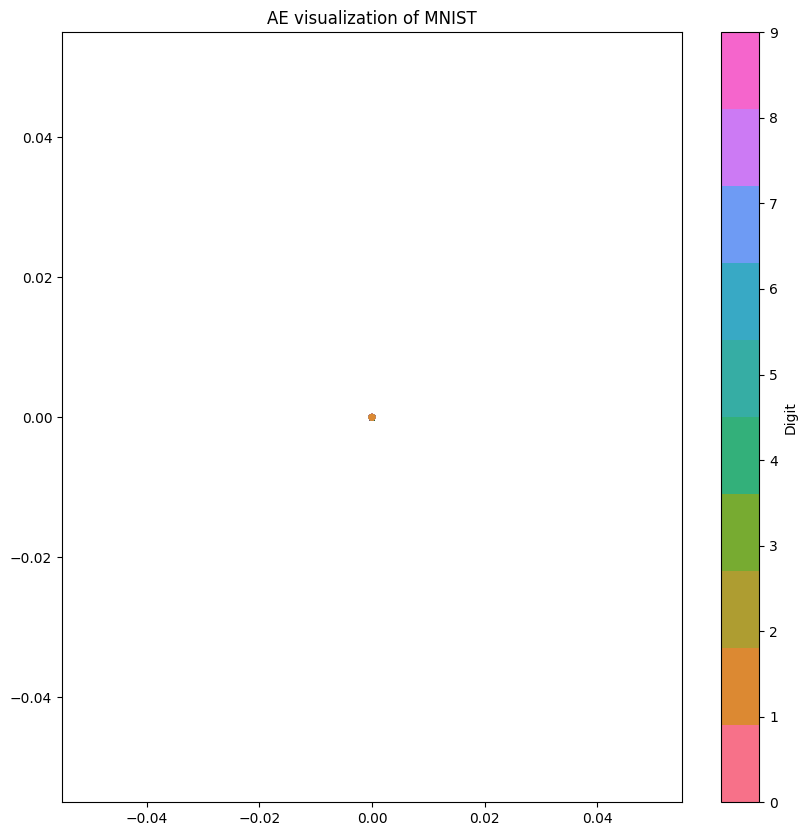

In [32]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('AE visualization of MNIST')

im = ax.scatter(dim_2d[:,0], dim_2d[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

### Feature Extraction and Transfer learning

In [33]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#add NOISE
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


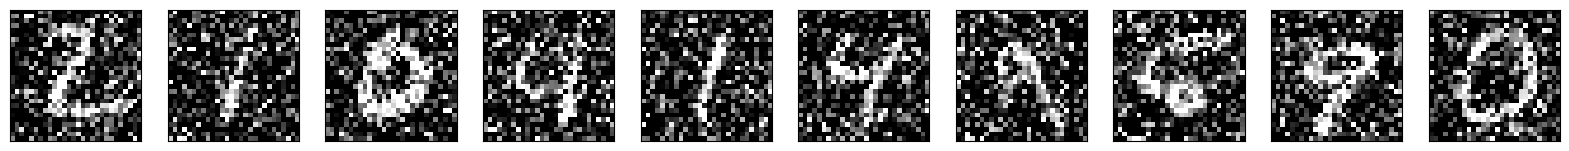

In [34]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [35]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.3484 - val_loss: 0.2116
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2008 - val_loss: 0.1770
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1743 - val_loss: 0.1636
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1619 - val_loss: 0.1536
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1526 - val_loss: 0.1477
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1473 - val_loss: 0.1436
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1433 - val_loss: 0.1403
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1399 - val_loss: 0.1379
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1376 - val_loss: 0.1358
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1351 - val_loss: 0.1338
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1332 - val_loss: 0.1317
Epoch 12/100
235/235 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


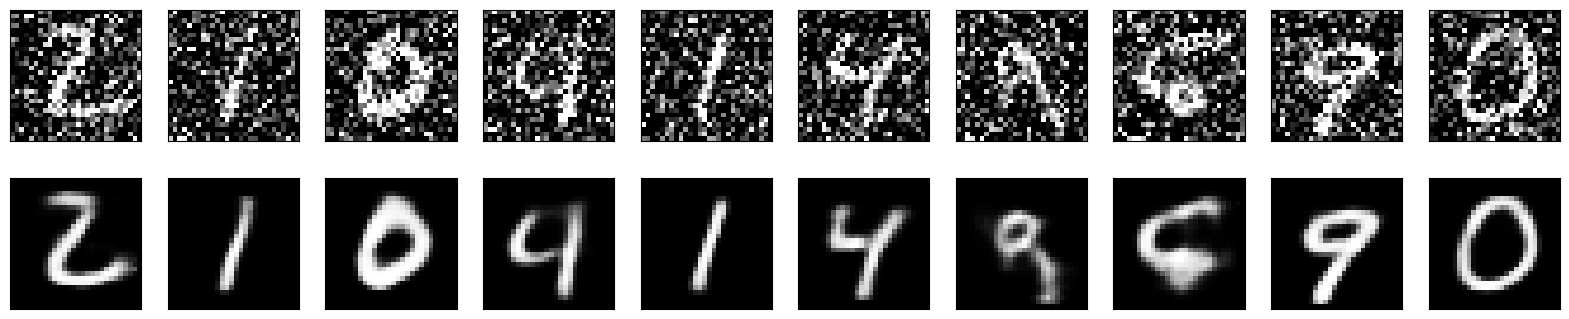

In [36]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Code walkthough

In [37]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [38]:
!gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
!gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

Downloading...
From: https://drive.google.com/uc?id=1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 71.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD
To: /content/movies.csv
100% 516k/516k [00:00<00:00, 114MB/s]


In [39]:
ratings = pd.read_csv('ratings.csv')

In [40]:
ratings.shape

(105339, 4)

In [41]:
ratings.movieId.unique().shape

(10325,)

In [42]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [43]:
rm.shape

(10325, 668)

#### Check the sparsity of data

In [44]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

np.float64(0.015272940801206305)

#### Splitting in train val

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train, val = train_test_split(rm, test_size = 0.2)

In [47]:
X_train = train.values

In [48]:
X_train.shape


(8260, 668)

In [49]:
X_val = val.values

In [50]:
X_val.shape

(2065, 668)

### Training Auto Encoders

In [51]:
import keras
from keras import layers

In [63]:
input_movie = keras.Input(shape=(668,))
encoded = layers.Dense(512, activation='relu')(input_movie)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)


decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(668, activation='linear')(decoded)

In [64]:
autoencoder = keras.Model(input_movie, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


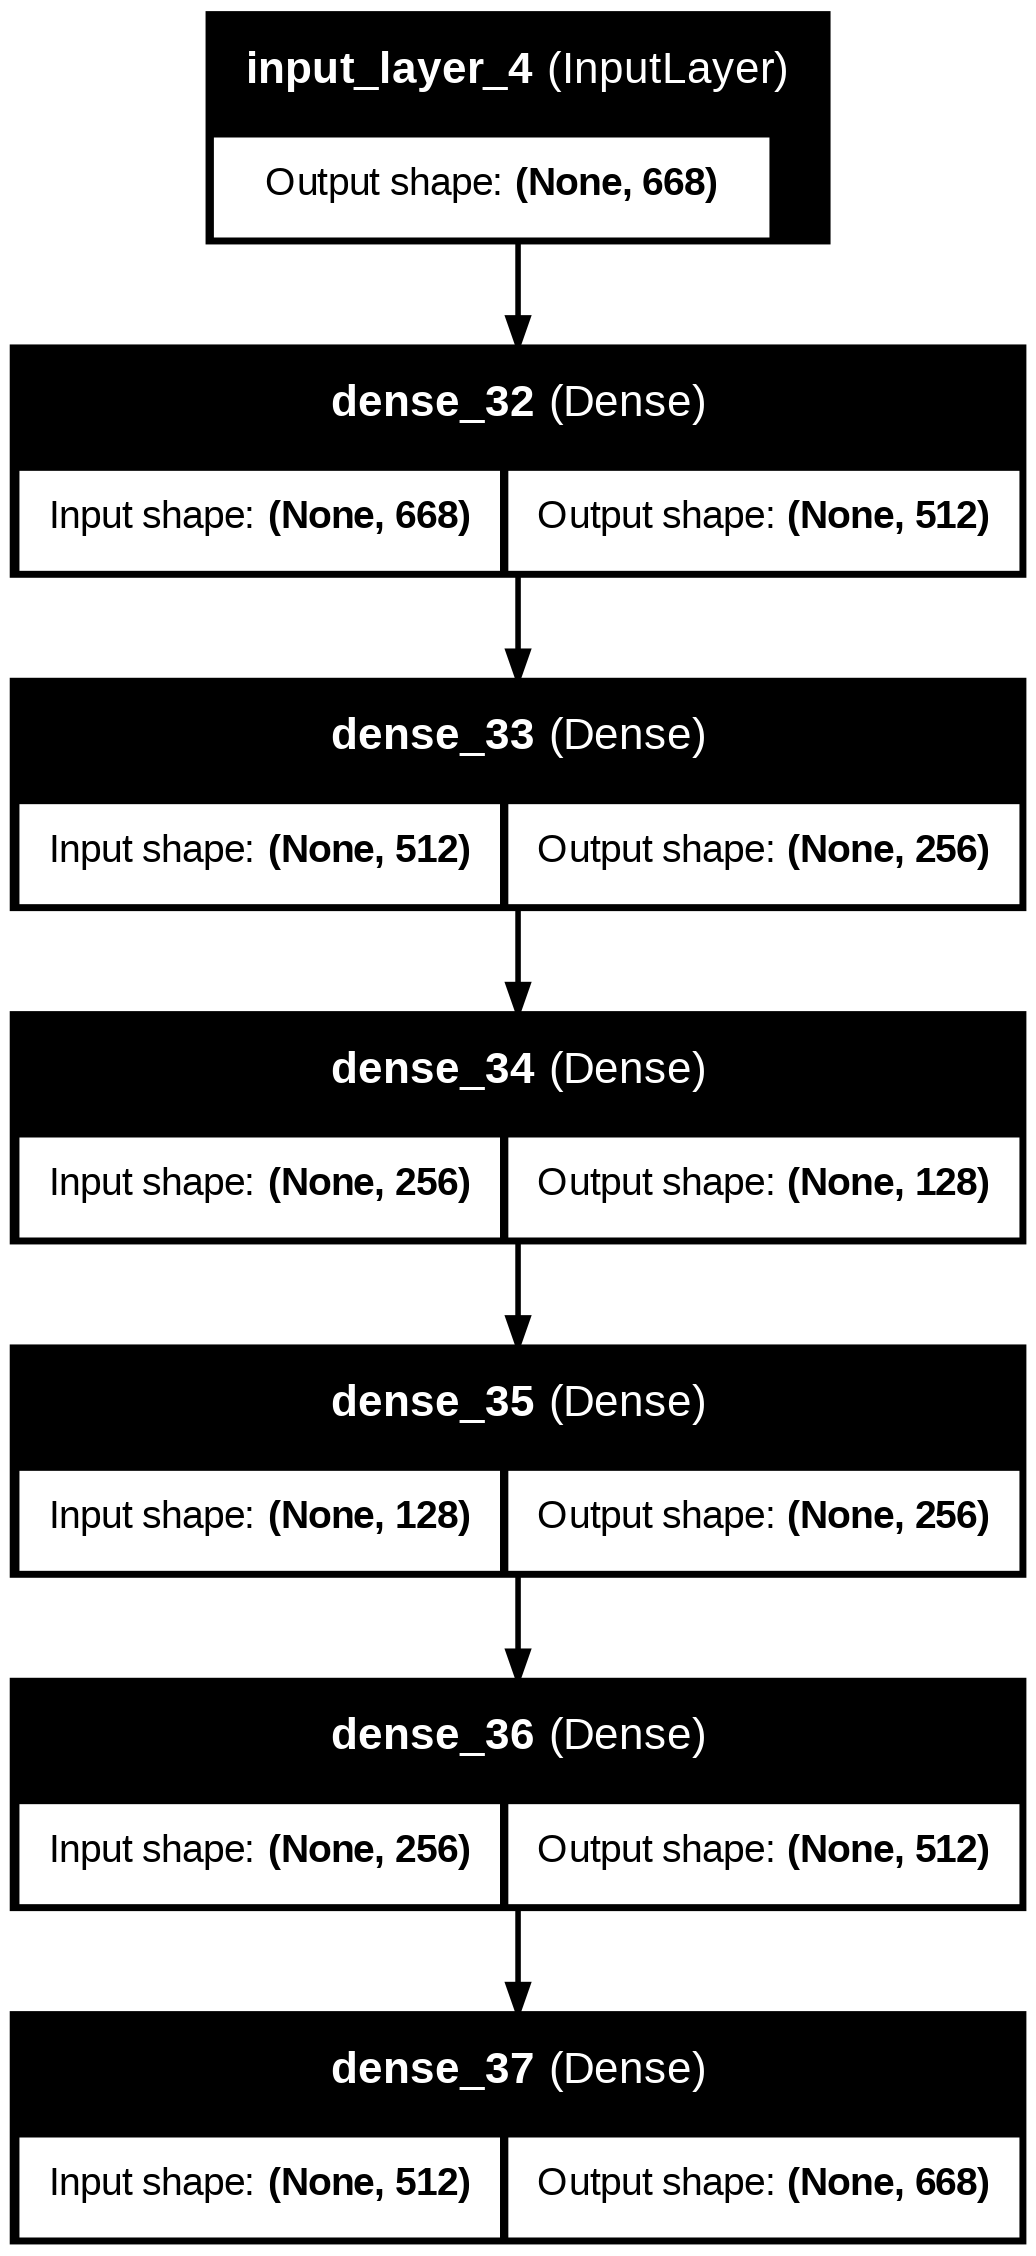

In [65]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [66]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1749 - val_loss: 0.1516
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1476 - val_loss: 0.1382
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1320 - val_loss: 0.1304
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.1202 - val_loss: 0.1233
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.1194 - val_loss: 0.1180
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1104 - val_loss: 0.1138
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1058 - val_loss: 0.1108
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0971 - val_loss: 0.1081
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0929 - val_loss: 0.1066
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0855 - val_loss: 0.1053
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0888 - val_loss: 0.1034
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step

#### Extracting embeddings

In [67]:
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 668)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       342,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 668)            │       342,684 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,042,134 (11.60 MB)

 Trainable params: 1,014,044 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,028,090 (7.74 MB)

In [68]:
autoencoder.layers[3].output

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_39>

In [69]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)


In [70]:
embeddings = intermediate_model.predict(rm.values)

323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [71]:
embeddings

array([[ 6.017942  ,  0.        ,  0.        , ..., 14.091851  ,
         0.        ,  3.3603673 ],
       [ 5.9248204 ,  0.        ,  0.        , ...,  5.995252  ,
         0.        ,  7.283602  ],
       [ 0.        ,  0.        ,  0.        , ...,  8.016155  ,
         0.        ,  4.1246195 ],
       ...,
       [ 0.17640899,  0.        ,  0.        , ...,  0.1792231 ,
         0.        ,  0.23360793],
       [ 0.32538152,  0.        ,  0.        , ...,  0.5955604 ,
         0.        ,  0.9510647 ],
       [ 0.19501443,  0.        ,  0.        , ...,  0.23564926,
         0.        ,  0.28692868]], dtype=float32)

In [72]:
embeddings.shape

(10325, 128)

#### Finding similar movies - Cosine similarity

In [73]:
from sklearn.metrics.pairwise import cosine_similarity


In [74]:
similarity_matrix = cosine_similarity(embeddings)

In [75]:
similarity_matrix.shape

(10325, 10325)

In [76]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.676760,0.666714,0.627948,0.758476,0.640172,0.695904,0.762531,0.617052,0.615060,...,0.549610,0.580503,0.568540,0.615651,0.526551,0.433140,0.453753,0.589645,0.540084,0.573114
2,0.676760,1.000000,0.722335,0.706165,0.715256,0.603064,0.726017,0.731798,0.645913,0.684574,...,0.674141,0.651832,0.665049,0.676762,0.666152,0.567840,0.582172,0.657783,0.648567,0.647680
3,0.666714,0.722335,1.000000,0.746232,0.853034,0.655218,0.791295,0.763117,0.788143,0.550919,...,0.558079,0.624073,0.640141,0.633571,0.575813,0.562671,0.569256,0.626914,0.609382,0.621781
4,0.627948,0.706165,0.746232,1.000000,0.710688,0.672201,0.749040,0.836184,0.792741,0.637217,...,0.685457,0.686813,0.736727,0.692448,0.684880,0.607577,0.615924,0.687963,0.701641,0.686196
5,0.758476,0.715256,0.853034,0.710688,1.000000,0.658331,0.866019,0.774713,0.780458,0.572438,...,0.599184,0.627657,0.662831,0.646345,0.607909,0.542377,0.552163,0.632683,0.627374,0.623673


In [77]:
movies = pd.read_csv('movies.csv')

In [78]:
movies[movies.title.str.contains('Liar Liar')]

,movieId,title,genres
1202,1485,Liar Liar (1997),Comedy


In [79]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

,1485
movieId,
1485,1.000000
2321,0.850480
1777,0.847190
104,0.845247
3861,0.841808
1047,0.839153
1673,0.836564
1760,0.835108
1552,0.833497


In [80]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index

In [81]:
movies[movies.movieId.isin(movie_index)]

,movieId,title,genres
94,104,Happy Gilmore (1996),Comedy
852,1047,"Long Kiss Goodnight, The (1996)",Action|Drama|Thriller
1184,1461,Vegas Vacation (National Lampoon's Las Vegas V...,Comedy
1202,1485,Liar Liar (1997),Comedy
1249,1552,Con Air (1997),Action|Adventure|Thriller
1336,1673,Boogie Nights (1997),Drama
1390,1760,Spice World (1997),Comedy
1398,1777,"Wedding Singer, The (1998)",Comedy|Romance
1835,2321,Pleasantville (1998),Comedy|Drama|Fantasy
3050,3861,"Replacements, The (2000)",Comedy
